# Домашнее задание "Методология ведения DS-проектов"

### Задание

Возьмите задачу с винами (https://www.kaggle.com/rajyellow46/wine-quality) и решите ее, оформив в виде CrispDM-подхода. Решение - jupyter notebook на github или colab.

<b><i>Примечание:</i></b> обычно эту задачу решают как задачу классификации, но в данном отчёте хочу рассмотреть её, как задачу регрессии

# 1. Понимание бизнеса

## 1.1 Цель
Предсказать качество вина на основе его физико-химических признаков по шкале от 0 до 10

## 1.2 Описание
В данном случае описание взято из Kaggle, но в реальной жизни модель может использоваться, например, на производстве для независимой оценки производимого продукта.

Эти два набора данных относятся к красному и белому вариантам португальского вина "Винью Верде". Ссылка [Cortez et al., 2009]. Из-за проблем с конфиденциальностью и логистикой доступны только физико-химические (исходные) и сенсорные (выходные) переменные (например, нет данных о сортах винограда, марке вина, продажной цене вина и т. Д.).

Эти наборы данных можно рассматривать как задачи классификации или регрессии. Классы упорядочены и не сбалансированы (например, нормальных вин едят больше, чем отличных или плохих). Алгоритмы обнаружения выбросов могут использоваться для обнаружения нескольких отличных или плохих вин. Кроме того, мы не уверены, все ли входные переменные актуальны. Так что было бы интересно протестировать методы выбора функций.

Два набора данных были объединены, и несколько значений были удалены случайным образом.

[Описание от Kaggle](https://www.kaggle.com/rajyellow46/wine-quality)

# 2. Data Understanding

## 2.1 Import Libraries

In [131]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Modelling Algorithms
from sklearn import ensemble
from sklearn import linear_model

# Modelling Helpers
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

%matplotlib inline
pylab.rcParams['figure.figsize'] = 8, 6

## 2.2 Загрузка данных

In [133]:
df = pd.read_csv( 'winequalityN.csv')

## 2.3 Статистика и визуализации


In [134]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


**Описание переменных**

    - тип (белое или красное)
    - фиксированная кислотность
    - летучая кислотность
    - лимонная кислота
    - остаточный сахар
    - хлориды
    - свободный диоксид серы
    - общий диоксид серы
    - плотность
    - pH
    - сульфаты
    - спирт
    - качество (оценка от 0 до 10)

[Больше информации на сайте Kaggle](https://www.kaggle.com/rajyellow46/wine-quality)

### 2.4.1 Информация о переменных

Посмотрим общую информацию о переменных. В дата-сете:
- 6497 строк
- type(тип вина) - категориальныя переменная, принимает 2 значения: white и red
- quality (качество вина) - целевая переменная, представлена целыми числами от 0 до 10
- остальные переменные представлены числами с плавающей запятой

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


### 2.4.2 Пропуски в данных

Посмотрим на кол-во пропусков, их немного. Все пропуски в переменных с плавающей запятой.

In [137]:
df.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

### 2.4.3 Основные статистики

In [138]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Можно заметить, что фактичкие значения целевой переменной quality от 3 до 9. А такие переменные, как остаточный сахар и хлориды имеют аномально высокие максимальные значения. Например, для хлоридов это 0.61 при среднем 0.05. Это могут быть как ошибки в данных, так и показатели, влияющие на оценку

### 2.4.4 Взаимосвязь между типом и качеством вина

Посмотрим, влияет ли тип вина (белое или красное), на его качество. В дата-сете приобладает белое вино:

In [139]:
df.type.value_counts()

white    4898
red      1599
Name: type, dtype: int64

Посмотрим распределение целевой переменной: общее и для каждого типа вина по отдельности

[Text(0.5, 1.0, 'Type - General')]

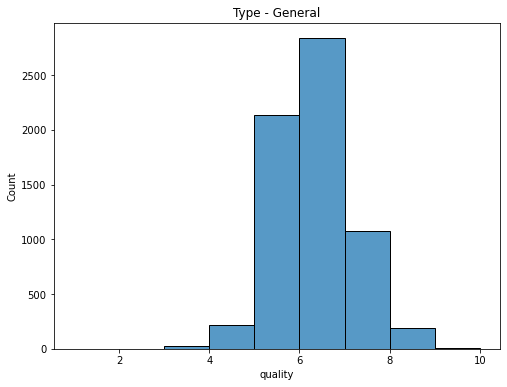

In [140]:
sns.histplot(data=df, x="quality", binwidth=1, binrange=(1, 10)).set(title='Type - General')

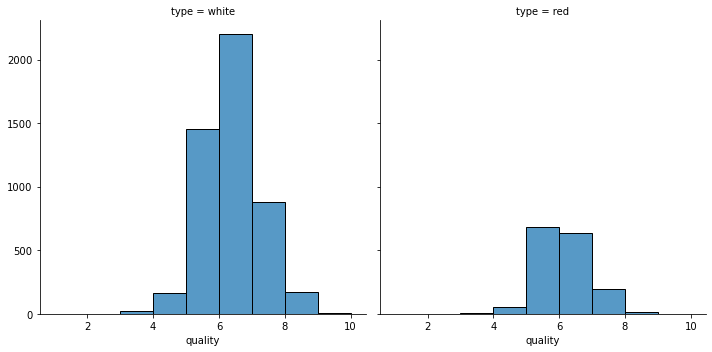

In [141]:
g = sns.FacetGrid(df, col = 'type', height=5, aspect=1)
g.map(sns.histplot, 'quality', binwidth=1, binrange=(1, 10))

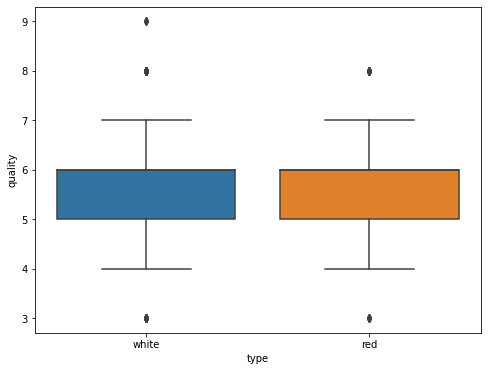

In [142]:
sns.boxplot(x="type", y="quality", data=df)
plt.show()

По графикам видно, что чаще всего оценка вина средняя: 5 или 6. При этом белому вину чаще ставится оценка 6, чем 5, а для красного вина доли этих оценок примерно равны.

Если бы нам было достаточно классифицировать вино по качеству(хорошее/плохое/срденее), то тип вина можно было бы не использовать. Но для предстказания точной оценки оставим этот признак. 

### 2.4.5 Тепловая карта корреляции

Посмотрим на корреляцию между переменными, для этого построим тепловую карту. Карта учитывает только цифровые значения, поэтому, чтобы тип вина попал в карту, заменим категориальные значения white и red на 0 и 1 

In [143]:
le = LabelEncoder()
df.type = le.fit_transform(df.type)

df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


<AxesSubplot:>

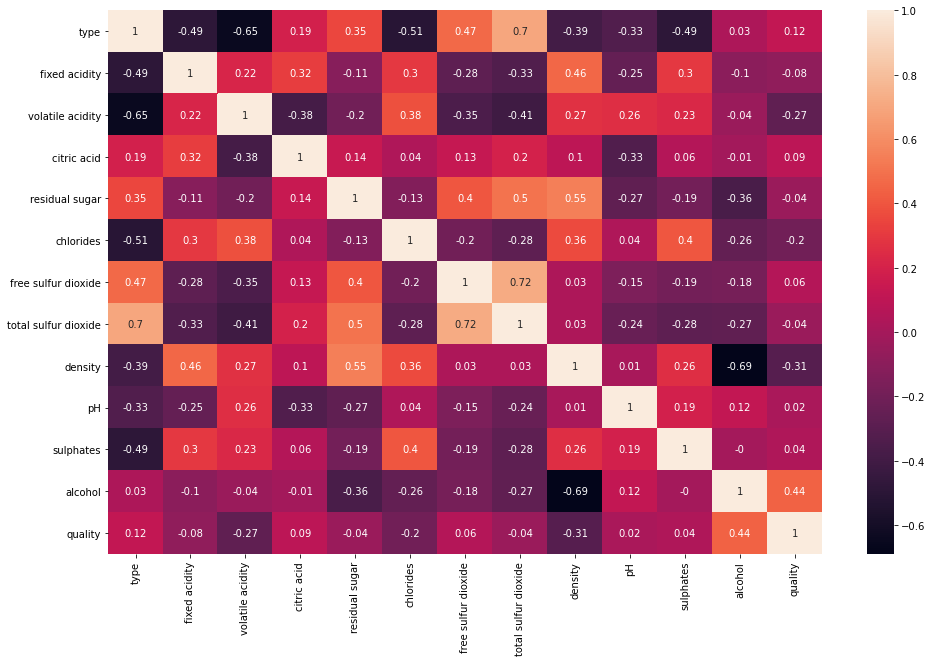

In [144]:
plt.figure(figsize=(16, 10))
sns.heatmap(df.corr().round(2), annot=True)

На тепловой карте видно, что переменные, которые больше всего коррелируют с качеством вина - это летучая кислотность, плотность и спирт. Тип вина влияет на качество незначительно, но имеет сильные зависимости с некоторыми другими переменными.

### 2.4.6 Визуализация зависимостей качества вина от важных переменных

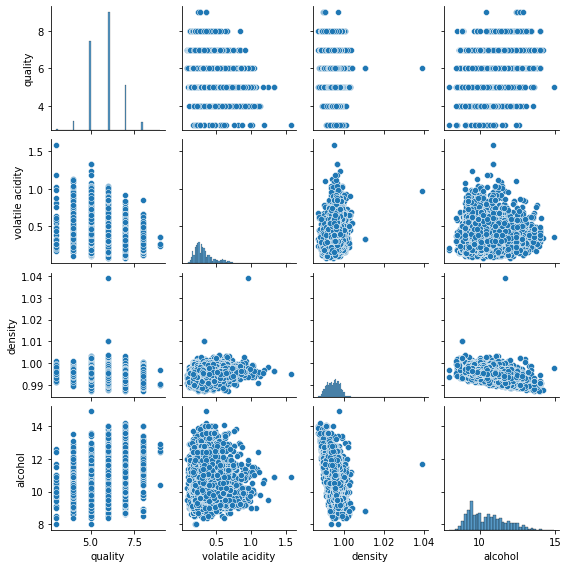

In [145]:
sns.pairplot(df[['quality', 'volatile acidity', 'density', 'alcohol']], height=2, aspect=1)

# 3. Data Preparation

## 3.1 Заполнение пропущенных значений

Заменим пропуски в данных на среднее значение

In [146]:
df = df.fillna(df.mean())

In [147]:
df.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## 3.2 Сборка финальных датасетов для моделирования

### 3.2.1 Удаляем из датасета целевую переменную

In [172]:
X = df.drop('quality', axis=1)
y = df.quality

### 3.2.2 Нормализуем данные

In [173]:
scaler = MinMaxScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1.0,0.264463,0.126667,0.216867,0.308282,0.059801,0.152778,0.377880,0.267785,0.217054,0.129213,0.115942
1,1.0,0.206612,0.146667,0.204819,0.015337,0.066445,0.045139,0.290323,0.132832,0.449612,0.151685,0.217391
2,1.0,0.355372,0.133333,0.240964,0.096626,0.068106,0.100694,0.209677,0.154039,0.418605,0.123596,0.304348
3,1.0,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362
4,1.0,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362


# 4. Моделирование
Теперь попробуем построить несколько моделей. Для этого:
- разделим данные на тестовую и обучающую выборки.
- в обучающей выборке выделим выборку для валидации. На ней будем тестировать модели и смотреть метрики
- после выбора лучшей модели проверим качество на тестовой выборке

## 4.1 Разделение данных

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4.2 Вспомогательные функции

In [217]:
def fit_model(X, y, model, random_seed=42, test_size=0.2, show_results=False, X_test=None, y_test=None, prin=True):   
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, random_state=random_seed)

    model.fit(X_train, y_train)       
    
    if show_results:
        pred_values_test = model.predict(X_test)
        
        print('TEST SET')
        print('Error RMSE: {}'.format(mean_squared_error(y_test, pred_values_test) ** 0.5))    
        print('Score: {}'.format(model.score(X_test, y_test)))  
        
    else:
        pred_values_train = model.predict(X_train)
        pred_values_val = model.predict(X_val)
        
        if prin:
            print('TRAIN SET')
            print('Error RMSE: {}'.format(mean_squared_error(y_train, pred_values_train) ** 0.5))    
            print('Score: {}'.format(model.score(X_train, y_train)))   
            print()
            print('VALIDATION SET')
            print('Error RMSE: {}'.format(mean_squared_error(y_val, pred_values_val) ** 0.5))    
            print('Score: {}'.format(model.score(X_val, y_val))) 
        else:
            return mean_squared_error(y_val, pred_values_val) ** 0.5

## 4.3 Выбор модели
Будем строить несколько моделей:
- линейная регрессия
- случайный лес
- градиентный бустинг
- стекинг (случайный лес + градиентный бустинг, на выходе линейная регрессия)

## 4.4 Подбор гиперпараметров
Для подбора гиперпараметров будем использовать перебор и графики

## 4.5 Оценка модели
Для оценки моделей будем использовать среднеквадратичную ошибку RMSE и Score

### 4.5.1 LinearRegression

In [175]:
fit_model(X_train, y_train, model=linear_model.LinearRegression())

TRAIN SET
Error RMSE: 0.7593250042079384
Score: 0.2547116635760003

VALIDATION SET
Error RMSE: 0.7518619928348589
Score: 0.2727844582662363


Это отправная точка. Ошибка на обучении и на валидации почти одинаковая, можно предположить, что при использовании этой модели не будет проблем с переобучением 

### 4.5.2 RandomForestRegressor

Для этой модели нужно подобрать подходящие гиперпараметры. Для этого переберём несколько основных параметров, измерим RMSE и построим график её изменения.

Будем перебирать:

- n_estimators - от 5 до 100
- max_depth - от 1 до 20

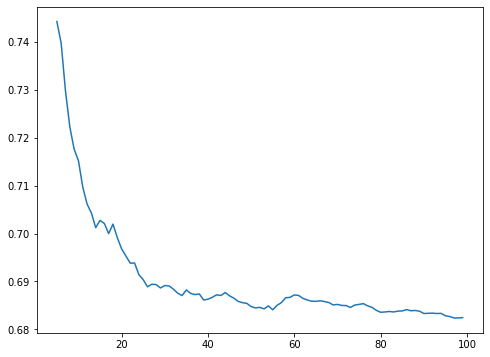

In [178]:
n_estimators = []

for i in range(5, 100):
    error = fit_model(X_train, y_train, model=ensemble.RandomForestRegressor(random_state=42, n_jobs=-1, n_estimators=i), prin=False)
    n_estimators.append(error)    
    
plt.plot(range(5, 100), n_estimators)

По графику видно, что после n_estimators = 25, ошибка убывает медленно. Остановимся на значении 55

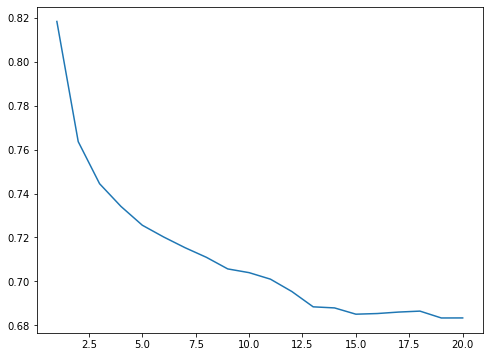

In [227]:
# max_depth
max_depth = []

for i in range(1, 21):
    error = fit_model(X_train, y_train, model=ensemble.RandomForestRegressor(random_state=42, n_jobs=-1, n_estimators=55, max_depth=i), prin=False)
    max_depth.append(error)    
    
plt.plot(range(1, 21), max_depth)

По графику видно, что после max_depth = 15, ошибка меняется незначительно. Остановимся на значении 15

На основе графиков оставляем следующие гиперпараметры:

    - n_estimators - 55
    - max_depth - 15

In [226]:
fit_model(X_train, y_train, model=ensemble.RandomForestRegressor(random_state=42, n_jobs=-1, 
                                                                 n_estimators=55, min_samples_leaf=20, max_depth=15, 
                                                                 criterion='mse'))

TRAIN SET
Error RMSE: 0.6861706274610078
Score: 0.3913982886232087

VALIDATION SET
Error RMSE: 0.7198799841980028
Score: 0.333335874059685


### 4.5.3 GradientBoostingRegressor

Будем перебирать:

- n_estimators - от 5 до 100
- max_depth - от 1 до 20
- learning_rate - от 0 до 1 с шагом 0.1  

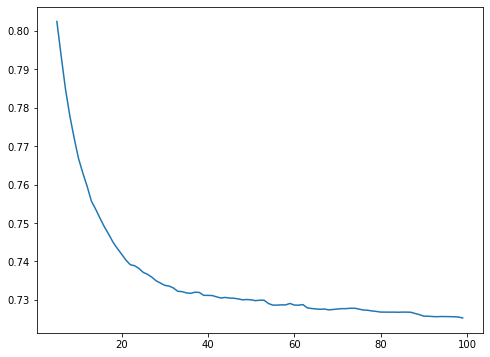

In [191]:
n_estimators = []

for i in range(5, 100):
    error = fit_model(X_train, y_train, model=ensemble.GradientBoostingRegressor(random_state=42, n_estimators=i), prin=False)
    n_estimators.append(error)    
    
plt.plot(range(5, 100), n_estimators)

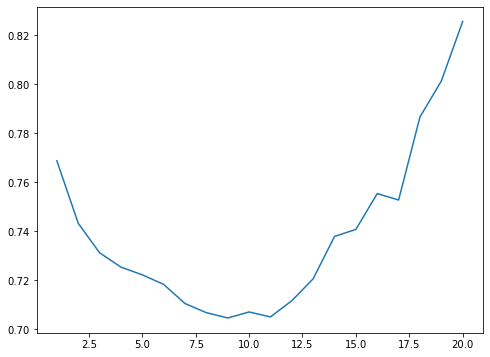

In [192]:
# max_depth
max_depth = []

for i in range(1, 21):
    error = fit_model(X_train, y_train, model=ensemble.GradientBoostingRegressor(random_state=42, n_estimators=40, max_depth=i), prin=False)
    max_depth.append(error)    
    
plt.plot(range(1, 21), max_depth)

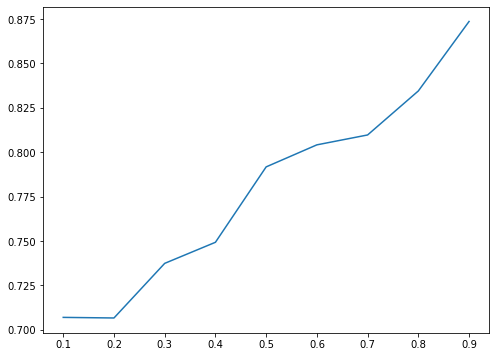

In [194]:
# learning_rate
learning_rate = []

for i in np.arange(0.1, 1., 0.1):
    error = fit_model(X_train, y_train, model=ensemble.GradientBoostingRegressor(random_state=42, n_estimators=40, max_depth=10, learning_rate=i), prin=False)
    learning_rate.append(error)    
    
plt.plot(np.arange(0.1, 1., 0.1), learning_rate)

На основе графиков оставляем следующие гиперпараметры:

    - n_estimators - 40
    - max_depth - 10
    - learning_rate - 0.2

In [204]:
fit_model(X_train, y_train, model=ensemble.GradientBoostingRegressor(random_state=42, n_estimators=40, min_samples_leaf=100, max_depth=10, loss='huber', learning_rate=0.2))

TRAIN SET
Error RMSE: 0.6835110145525933
Score: 0.39610705332607243

VALIDATION SET
Error RMSE: 0.7235059405626171
Score: 0.3266031327461022


### 4.5.4 StackingRegressor

In [205]:
boosting_params = {'n_estimators': 40,
                  'max_depth': 10,
                  'min_samples_leaf': 100,
                   'loss': 'huber',
                  'random_state': 42}    

forest_params = {'n_estimators': 50,
                  'max_depth': 13,
                  'min_samples_leaf': 20,
                  'n_jobs': -1,
                  'random_state': 42}

In [210]:
model=StackingRegressor([('gb', ensemble.GradientBoostingRegressor(**boosting_params)),('rf', ensemble.RandomForestRegressor(**forest_params))], 
                         linear_model.LinearRegression())

In [211]:
fit_model(X_train, y_train, model=model)

TRAIN SET
Error RMSE: 0.693011281872215
Score: 0.3792031111568468

VALIDATION SET
Error RMSE: 0.722297886769296
Score: 0.32885002647620076


# 5. Оценка

Мы получили следующие результаты:

- Обычная линейная регрессия показывает худший результат из представленных моделей (RMSE: 0.75), но не имеет проблем с переобучением    
- Случайный лес, градиентный бустинг и стекинг показывают практически одинаковые результаты (RMSE: 0.71-0.72), но есть переобучение
- Случайный лес работает чуть лучше, чем остальные модели и имеет меньшее переобучение.
    
Ранее мы выделили тестовую выборку, которую ещё не использовали. Протестируем на этой выборке полученную модель случайного леса.

In [216]:
fit_model(X_train, y_train, model=ensemble.RandomForestRegressor(**forest_params), show_results=True, X_test=X_test, y_test=y_test)

TEST SET
Error RMSE: 0.6822604601550594
Score: 0.3487972568297979


Результат получился даже лучше, чем на валидационной выборке.

# 6. Развертывание

В этой задаче на Kaggle нет таблицы лидеров. Результатом развёртывания могла бы стать публикация содержимого этого ноутбука на Kaggle.